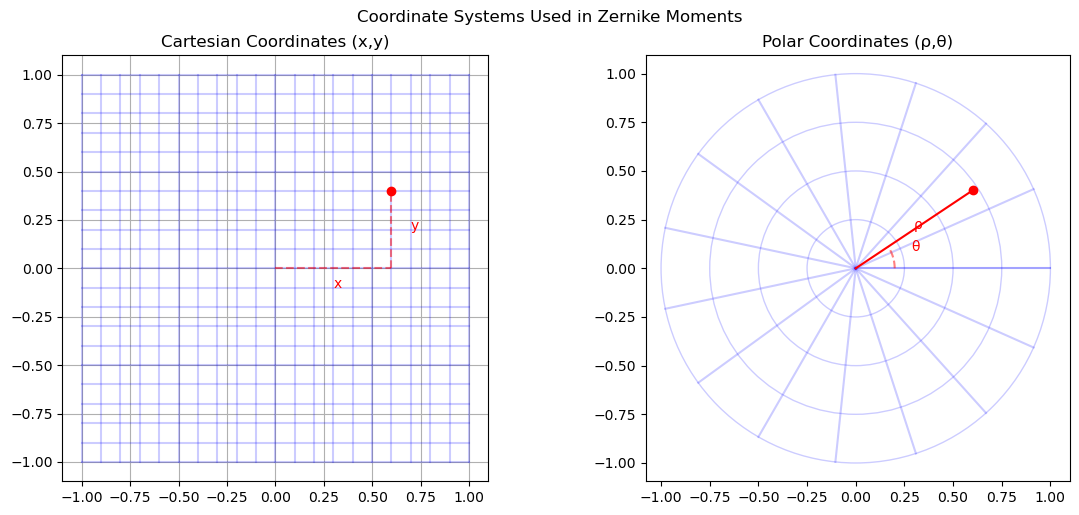

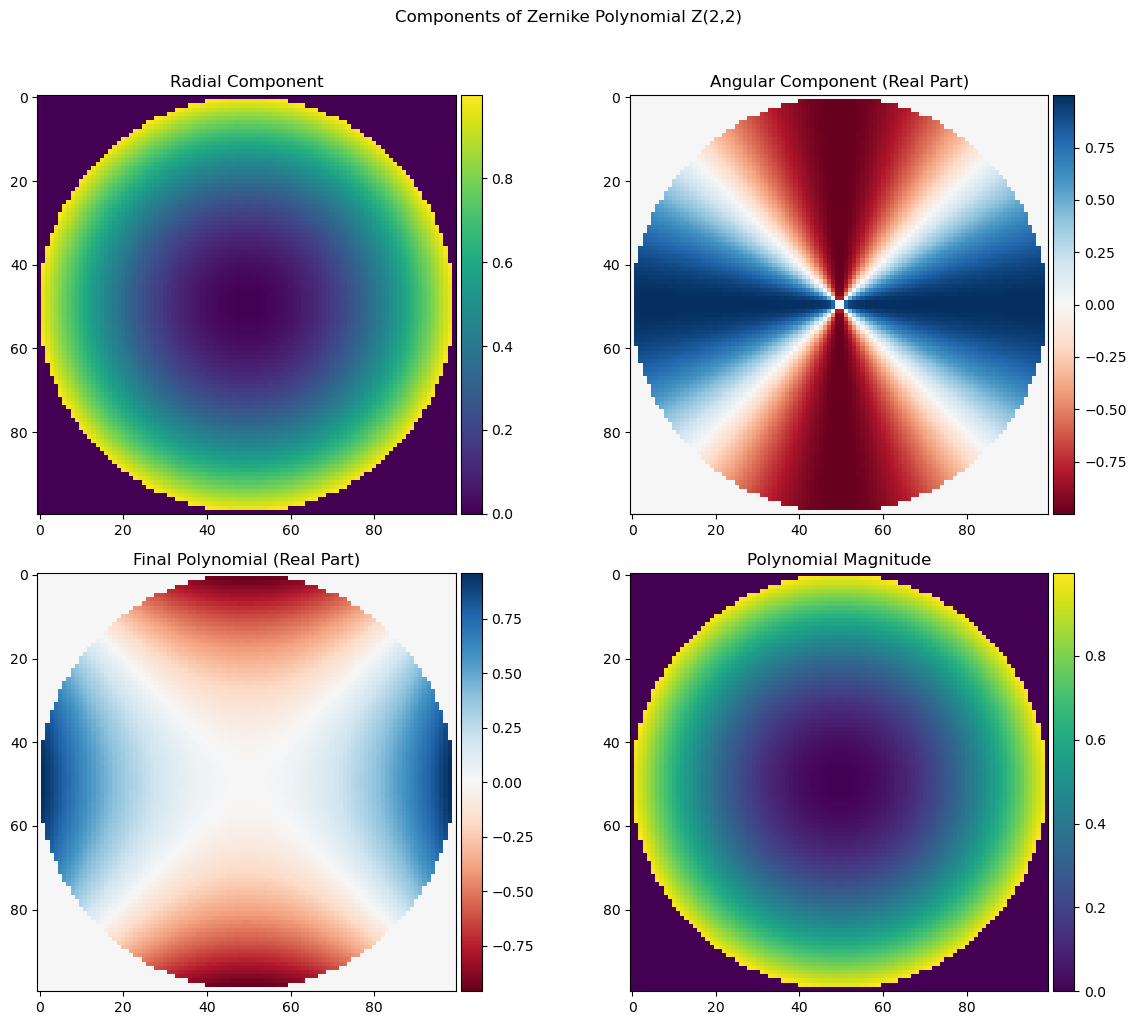

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
np.math = math
def create_coordinate_visualization():
    """Visualize the difference between Cartesian and polar coordinates"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Cartesian grid
    x = np.linspace(-1, 1, 21)
    y = np.linspace(-1, 1, 21)
    X, Y = np.meshgrid(x, y)
    
    # Draw Cartesian grid
    ax1.plot(X, Y, 'b-', alpha=0.2)
    ax1.plot(X.T, Y.T, 'b-', alpha=0.2)
    ax1.set_title('Cartesian Coordinates (x,y)')
    ax1.set_aspect('equal')
    ax1.grid(True)
    
    # Draw example point
    point_x, point_y = 0.6, 0.4
    ax1.plot([0, point_x], [0, 0], 'r--', alpha=0.5)
    ax1.plot([point_x, point_x], [0, point_y], 'r--', alpha=0.5)
    ax1.plot(point_x, point_y, 'ro')
    ax1.text(point_x/2, -0.1, 'x', color='red')
    ax1.text(point_x+0.1, point_y/2, 'y', color='red')
    
    # Polar grid
    theta = np.linspace(0, 2*np.pi, 16)
    r = np.linspace(0, 1, 5)
    
    # Draw polar grid
    for radius in r:
        circle = plt.Circle((0,0), radius, fill=False, color='b', alpha=0.2)
        ax2.add_artist(circle)
    
    for angle in theta:
        ax2.plot([0, np.cos(angle)], [0, np.sin(angle)], 'b-', alpha=0.2)
    
    # Draw example point in polar coordinates
    rho = np.sqrt(point_x**2 + point_y**2)
    theta = np.arctan2(point_y, point_x)
    ax2.plot([0, rho*np.cos(theta)], [0, rho*np.sin(theta)], 'r-')
    ax2.plot(rho*np.cos(theta), rho*np.sin(theta), 'ro')
    
    # Add arc to show theta
    theta_range = np.linspace(0, theta, 50)
    arc_x = 0.2 * np.cos(theta_range)
    arc_y = 0.2 * np.sin(theta_range)
    ax2.plot(arc_x, arc_y, 'r--', alpha=0.5)
    
    ax2.text(0.3*np.cos(theta/2), 0.3*np.sin(theta/2), 'θ', color='red')
    ax2.text(rho/2*np.cos(theta), rho/2*np.sin(theta), 'ρ', color='red')
    
    ax2.set_title('Polar Coordinates (ρ,θ)')
    ax2.set_aspect('equal')
    
    plt.tight_layout()
    return fig

def show_zernike_components(n, m):
    """Show how radial and angular components combine to form Zernike polynomial"""
    size = 100
    y, x = np.ogrid[:size, :size]
    center = ((size-1)/2.0, (size-1)/2.0)
    rho = np.sqrt((x - center[1])**2 + (y - center[0])**2) / center[0]
    theta = np.arctan2(y - center[0], x - center[1])
    mask = rho <= 1
    
    # Calculate components
    rad = np.zeros_like(rho)
    for k in range((n-abs(m))//2 + 1):
        numerator = (-1)**k * np.math.factorial(n-k)
        denominator = (np.math.factorial(k) * 
                      np.math.factorial((n+abs(m))//2 - k) * 
                      np.math.factorial((n-abs(m))//2 - k))
        rad += numerator/denominator * rho**(n-2*k)
    
    ang = np.exp(-1j * m * theta)
    zernike = rad * ang * mask
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot radial component
    im1 = axes[0,0].imshow(rad * mask, cmap='viridis')
    axes[0,0].set_title('Radial Component')
    add_colorbar(im1, axes[0,0])
    
    # Plot angular component (real part)
    im2 = axes[0,1].imshow(np.real(ang) * mask, cmap='RdBu')
    axes[0,1].set_title('Angular Component (Real Part)')
    add_colorbar(im2, axes[0,1])
    
    # Plot final polynomial
    im3 = axes[1,0].imshow(np.real(zernike), cmap='RdBu')
    axes[1,0].set_title('Final Polynomial (Real Part)')
    add_colorbar(im3, axes[1,0])
    
    # Plot final polynomial magnitude
    im4 = axes[1,1].imshow(np.abs(zernike), cmap='viridis')
    axes[1,1].set_title('Polynomial Magnitude')
    add_colorbar(im4, axes[1,1])
    
    plt.suptitle(f'Components of Zernike Polynomial Z({n},{m})', y=1.02)
    plt.tight_layout()
    return fig

def add_colorbar(im, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

# Create visualizations
coordinate_fig = create_coordinate_visualization()
plt.figure(coordinate_fig.number)
plt.suptitle('Coordinate Systems Used in Zernike Moments', y=1.02)

# Show example Zernike polynomial components
zernike_fig = show_zernike_components(2, 2)

plt.show()

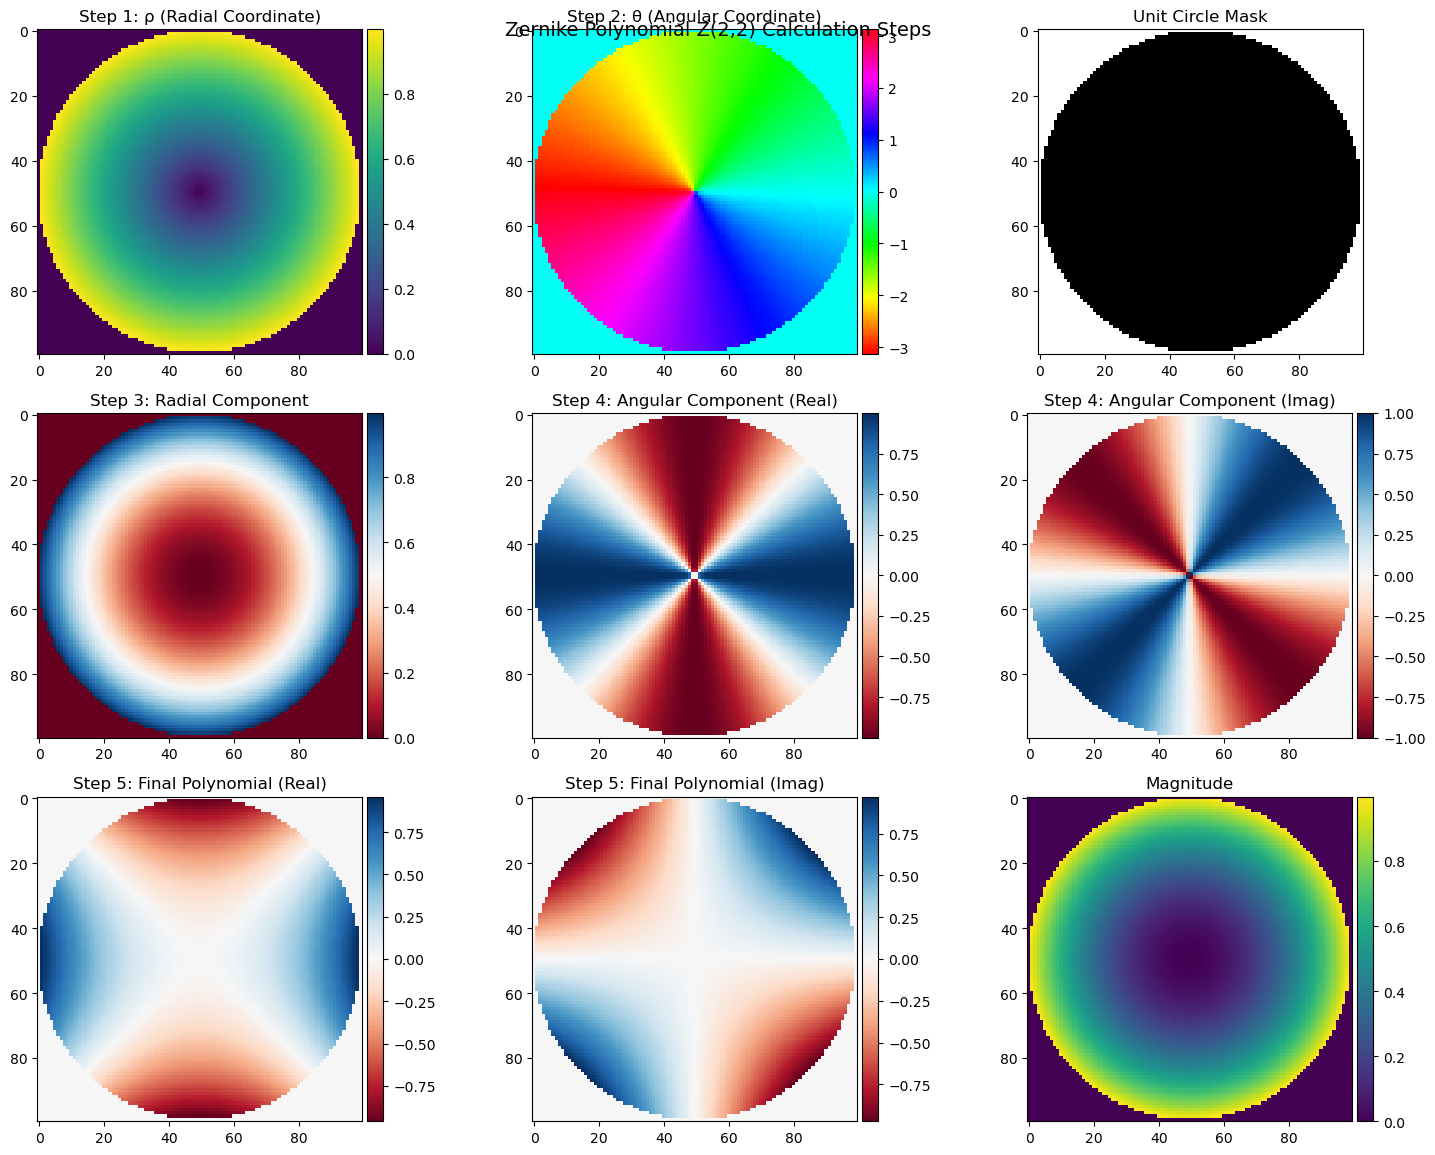

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

def calculate_zernike_radial(n, m, rho):
    """Calculate the radial component of Zernike polynomial"""
    rad = np.zeros_like(rho)
    for k in range((n-abs(m))//2 + 1):
        numerator = (-1)**k * np.math.factorial(n-k)
        denominator = (np.math.factorial(k) * 
                      np.math.factorial((n+abs(m))//2 - k) * 
                      np.math.factorial((n-abs(m))//2 - k))
        rad += numerator/denominator * rho**(n-2*k)
    return rad

def visualize_zernike_calculation_steps(n, m, size=100):
    """Visualize each step in calculating Zernike moments"""
    # Create coordinate grid
    y, x = np.ogrid[:size, :size]
    center = ((size-1)/2.0, (size-1)/2.0)
    
    # Step 1: Calculate rho (radial coordinate)
    rho = np.sqrt((x - center[1])**2 + (y - center[0])**2) / center[0]
    
    # Step 2: Calculate theta (angular coordinate)
    theta = np.arctan2(y - center[0], x - center[1])
    
    # Create circular mask
    mask = rho <= 1
    
    # Step 3: Calculate radial component
    rad = calculate_zernike_radial(n, m, rho)
    
    # Step 4: Calculate angular component
    ang = np.exp(-1j * m * theta)
    
    # Step 5: Combine components
    zernike = rad * ang * mask
    
    # Visualization
    fig = plt.figure(figsize=(15, 12))
    gs = plt.GridSpec(3, 3)
    
    # Plot coordinates
    ax1 = fig.add_subplot(gs[0, 0])
    im1 = ax1.imshow(rho * mask, cmap='viridis')
    ax1.set_title('Step 1: ρ (Radial Coordinate)')
    add_colorbar(im1, ax1)
    
    ax2 = fig.add_subplot(gs[0, 1])
    im2 = ax2.imshow(theta * mask, cmap='hsv')
    ax2.set_title('Step 2: θ (Angular Coordinate)')
    add_colorbar(im2, ax2)
    
    ax3 = fig.add_subplot(gs[0, 2])
    im3 = ax3.imshow(mask, cmap='binary')
    ax3.set_title('Unit Circle Mask')
    
    # Plot components
    ax4 = fig.add_subplot(gs[1, 0])
    im4 = ax4.imshow(rad * mask, cmap='RdBu')
    ax4.set_title('Step 3: Radial Component')
    add_colorbar(im4, ax4)
    
    ax5 = fig.add_subplot(gs[1, 1])
    im5 = ax5.imshow(np.real(ang) * mask, cmap='RdBu')
    ax5.set_title('Step 4: Angular Component (Real)')
    add_colorbar(im5, ax5)
    
    ax6 = fig.add_subplot(gs[1, 2])
    im6 = ax6.imshow(np.imag(ang) * mask, cmap='RdBu')
    ax6.set_title('Step 4: Angular Component (Imag)')
    add_colorbar(im6, ax6)
    
    # Plot results
    ax7 = fig.add_subplot(gs[2, 0])
    im7 = ax7.imshow(np.real(zernike), cmap='RdBu')
    ax7.set_title('Step 5: Final Polynomial (Real)')
    add_colorbar(im7, ax7)
    
    ax8 = fig.add_subplot(gs[2, 1])
    im8 = ax8.imshow(np.imag(zernike), cmap='RdBu')
    ax8.set_title('Step 5: Final Polynomial (Imag)')
    add_colorbar(im8, ax8)
    
    ax9 = fig.add_subplot(gs[2, 2])
    im9 = ax9.imshow(np.abs(zernike), cmap='viridis')
    ax9.set_title('Magnitude')
    add_colorbar(im9, ax9)
    
    plt.suptitle(f'Zernike Polynomial Z({n},{m}) Calculation Steps', y=0.95, size=14)
    plt.tight_layout()
    return fig

def add_colorbar(im, ax):
    """Add colorbar to plot"""
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

# Example usage
fig = visualize_zernike_calculation_steps(2, 2)
plt.show()

[ WARN:0@60.264] global loadsave.cpp:268 findDecoder imread_('your_image.jpg'): can't open/read file: check file path/integrity


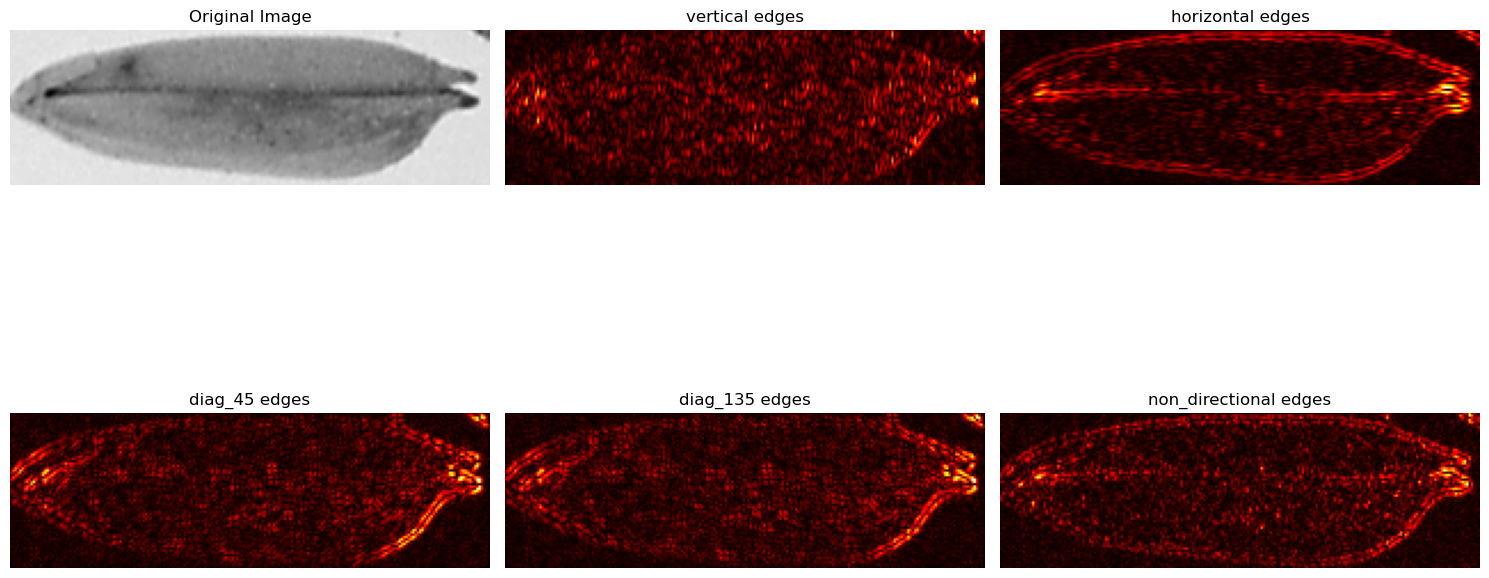

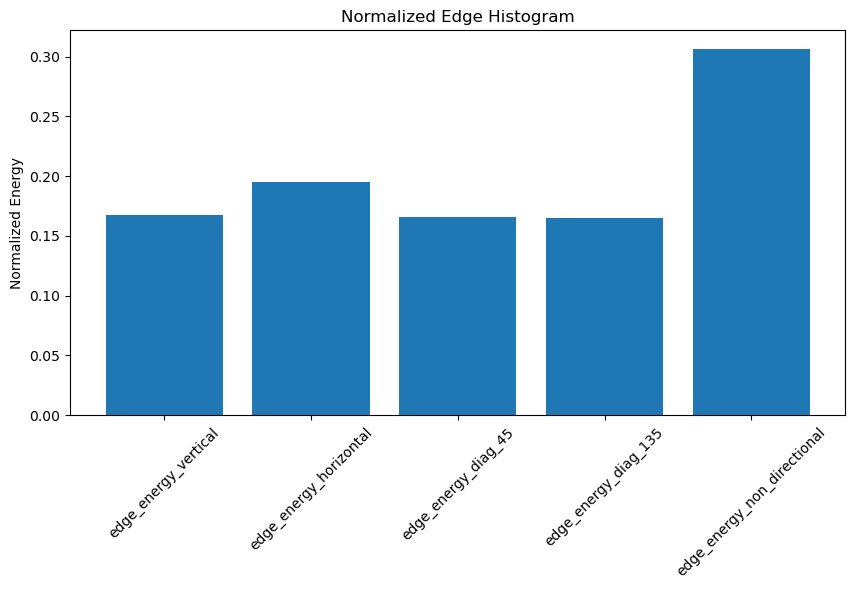

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve
from scipy.ndimage import convolve
def extract_edge_histogram_features(image):
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()
    
    # Define convolution kernels for five edge types.
    kernels = {
        "vertical": np.array([[-1,  2, -1],
                              [-1,  2, -1],
                              [-1,  2, -1]], dtype=np.float32),
        "horizontal": np.array([[-1, -1, -1],
                                [ 2,  2,  2],
                                [-1, -1, -1]], dtype=np.float32),
        "diag_45": np.array([[-1, -1,  2],
                             [-1,  2, -1],
                             [ 2, -1, -1]], dtype=np.float32),
        "diag_135": np.array([[ 2, -1, -1],
                              [-1,  2, -1],
                              [-1, -1,  2]], dtype=np.float32),
        "non_directional": np.array([[1,  1,  1],
                                     [1, -8,  1],
                                     [1,  1,  1]], dtype=np.float32),
        "sobel_x": np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=np.float32),
    
        "sobel_y": np.array([[-1, -2, -1],
                            [ 0,  0,  0],
                            [ 1,  2,  1]], dtype=np.float32),

        # Prewitt operators
        "prewitt_x": np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=np.float32),
        
        "prewitt_y": np.array([[-1, -1, -1],
                            [ 0,  0,  0],
                            [ 1,  1,  1]], dtype=np.float32),

        # Laplacian operators
        "laplacian_4": np.array([[0,  1,  0],
                                [1, -4,  1],
                                [0,  1,  0]], dtype=np.float32),
        
        "laplacian_8": np.array([[1,  1,  1],
                                [1, -8,  1],
                                [1,  1,  1]], dtype=np.float32),

        # Roberts Cross operators
        "roberts_x": np.array([[1, 0],
                            [0, -1]], dtype=np.float32),
        
        "roberts_y": np.array([[0, 1],
                            [-1, 0]], dtype=np.float32),

        # Scharr operators (better rotation invariance than Sobel)
        "scharr_x": np.array([[ -3, 0,  3],
                            [-10, 0, 10],
                            [ -3, 0,  3]], dtype=np.float32),
        
        "scharr_y": np.array([[-3, -10, -3],
                            [ 0,   0,  0],
                            [ 3,  10,  3]], dtype=np.float32),
    }
    
    features = {}
    total_energy = 0.0
    
    # Convolve the image with each kernel and compute the energy.
    for key, kernel in kernels.items():
        response = convolve(gray.astype(np.float32), kernel, mode="reflect")
        energy = np.sum(np.abs(response))
        features[f"edge_energy_{key}"] = energy
        total_energy += energy
    
    if total_energy > 0:
        for key in list(features.keys()):
            features[key] /= total_energy

    return features
def visualize_edge_detection_process(image, kernels):
    """
    Visualize the edge detection process using different kernels
    """
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()

    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    # Plot original image
    axes[0].imshow(gray, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot edge responses for each kernel
    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        response = convolve(gray.astype(np.float32), kernel, mode="reflect")
        axes[idx].imshow(np.abs(response), cmap='hot')
        axes[idx].set_title(f'{name} edges')
        axes[idx].axis('off')

    plt.tight_layout()
    return fig

def plot_edge_histogram(features):
    """
    Plot the normalized edge histogram
    """
    plt.figure(figsize=(10, 5))
    plt.bar(features.keys(), features.values())
    plt.xticks(rotation=45)
    plt.title('Normalized Edge Histogram')
    plt.ylabel('Normalized Energy')
    return plt.gcf()

# Example usage
image = cv2.imread('your_image.jpg')

# Define kernels (same as in your original code)
kernels = {
    "vertical": np.array([[-1,  2, -1],
                          [-1,  2, -1],
                          [-1,  2, -1]], dtype=np.float32),
    "horizontal": np.array([[-1, -1, -1],
                            [ 2,  2,  2],
                            [-1, -1, -1]], dtype=np.float32),
    "diag_45": np.array([[-1, -1,  2],
                         [-1,  2, -1],
                         [ 2, -1, -1]], dtype=np.float32),
    "diag_135": np.array([[ 2, -1, -1],
                          [-1,  2, -1],
                          [-1, -1,  2]], dtype=np.float32),
    "non_directional": np.array([[1,  1,  1],
                                 [1, -8,  1],
                                 [1,  1,  1]], dtype=np.float32)
}
image = cv2.imread('/home/duyle/Rice_photos/BC-15/BC-15/DSC6771_idx2.png')
# Visualize edge detection process
fig1 = visualize_edge_detection_process(image, kernels)

# Extract features
features = extract_edge_histogram_features(image)

# Plot histogram
fig2 = plot_edge_histogram(features)

plt.show()